# Section 45 - Deep NLP and Word Embeddings

1. Word embeddings
2. Word2Vec
3. Classification with word embeddings

**Rafael's Study Group:** https://youtu.be/RX-1ZGVmaLI

## 1. Word Embeddings

* vectorization strategy
* each word in a corpus is represented by a unique vector within a high-dimentional vector space
* captures semantic relationship of a word based on its location within the embedding space
    * Singular to plural
    * Present-tense to past-tense to future-tense
    * Gendered terms
    
### Semantic Relationships are Measured by Similarity Metrics

* **Cosine Similarity** - measure of the angle between the two word vectors
    * The smaller the angle, the more similar the words
    * The dot product of normalized word vectors is a range of -1 (super dissimilar) to +1 (super similar)
    * Used for Word2Vec.most_similar()
* Euclidean Distance - the "straight-line" distance between two points in space
    * The shorter the line, the more similar the words
* Jaccard Similarity - size of the intersection of two sets of words
    * Not covered explicity in the lessons/labs, but good to know/use when duplication of a word in a set/corpus does not necessarily affect its similarity.
    * Use on root words (lemmatization)
    
<img src='cosine_sim.png'>

**Toward's Data Science article covering similarity metrics better than I can:** https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50

### Embedding Space

* Count Vectorization and TF-IDF result in sparse vectors, where the vector has as many dimensions as there are words in the corpus and is full of zeros except for a one in the dimension corresponding to the word represented by that vector
    * Curse of Dimensionality
    * Hurts model performance
* For word embeddings created with Word2Vec, the size of the vector is tunable
    * Thus, the vectors are "dense" compared to the other two methods
    * Specifically, these vectors are composed of continuous values that are learned by the model (Word2Vec)
* Can be visualized with t-SNE
    * Visualization technique that reduces dimensionality even further, while trying to maintain data structure
    * Section22 Word Vectorization - Lab
    * A cool thing from Google: https://ai.googleblog.com/2016/12/open-sourcing-embedding-projector-tool.html

**Another article that explains this way better than I can:** https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526

**TAKE HOME:** A large corpus of words is condensed down to a lower-dimensional space where similar words (now as vector representations) are closer to one another.

<img src='both_figs3.png'>



## 2. Word2Vec

### Basic Model Construction

<font color='red'>input layer</font> **-->** <font color='blue'>single hidden layer</font> **-->** <font color='green'>softmax output layer</font>
   * <font color='red'> Input layer contains one neuron for every unique word in the corpus</font>
        * <font color='red'>Thus, each word will have a corresponding weight</font>
   * <font color='blue'> The size of the hidden layer (i.e number of neurons it contains) is a tunable parameter and corresponds to the number of "features" to include in the embedding space</font>
        * <font color='blue'>Neurons in the hidden layer learn the embedding space by training to predict the context of a word given a particular window size (i.e how the word was used in the window)</font>
   * <font color='green'> The output layer doesn't really matter because we used the weights from the hidden layer to generate the values for each word's vector</font>
   
   
### Code/Utilization

**Documentation:** https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html#gensim.models.Word2Vec

**More Documentation:** https://radimrehurek.com/gensim/models/word2vec.html



```python
# Library to import
from gensim.models import Word2Vec
from nltk import word_tokenize

# Preprocess data (get words as tokens)
data = df['text_blocks'].map(word_tokenize)

# Instantiate a model
model = Word2Vec(data, # iterable of tokenized words
                 size=integer, # size of the word vectors (features in embedding space)
                 window=integer, # size of the context window
                 min_count=integer, # number of times a word needs to appear in the corpus to be included
                 workers=integer) # number of processing cores to use

# Train the model
model.train(data, # iterable of tokenized words
            total_examples=model.corpus_count, # length/size of the corpus vocabulary
            epochs=integer) # number of epochs to complete during training

# Create a variable to house the word : vector dictionary
wv = model.wv

# This variable can now be used like a python dictionary to get the vector of a particular word. The returned 
# vector will be the length of the embedding size specified at model instantiation
wv['Moose']

# Call the most_similar() method on the word:vector dictionary to return words similar to a particular word
wv.most_similar(positive='Moose', top_n=4)

    # Returns an array of tuples containing the similar words and their cosine similarity scores:
        [('Best', 0.97),
         ('dog', 0.94),
         ('good', 0.92),
         ('boy', 0.89)]

# Can use the most_similar() method on an array of words (uses the mean of the vector weights for each word in
# the array
wv.most_similar(positive=['words', 'to', 'add'], negative=['subtract', 'from', 'array'], top_n=3)

    # Again, will return an array of tuples
```

**Or you can load the pretrained weights from GloVe and grab vectors for your corpus**
   * contains the weights for word vectors trained on 6 billion words

## 3. Using Word Embeddings for Text Classification

### Mean Word Embeddings

To use word vectors for classification tasks, add the vectors for each word in a block of text (e.g product review, twitter comment, body of an email) together and then divide by the total number of words in the text block (take the average)
   * Since each word vector has the same dimensionality, the mean word embedding for every block of text (regardless of length) will be the same size and thus, can be used as input for ML models or for deep learning with keras

### Code/Utilization - Classic ML


```python
# Import libraries
from nltk import word_tokenize
from gensim.models import Word2Vec

# Preprocess data
data = df['text_blocks'].map(word_tokenize).values

# Isolate the total vocabulary (set of unique words) of data
vocab = set(word for block in data for word in block)

# Pull only the vectors corresponding to words in the corpus vocabulary from GloVe

# dictionary to store word : vector
glove = {} 
# file where vector weights are stored
with open('glove.6B.50d.txt', 'rb') as f: 
    # loop through each line in the file, as each line corresponds to a word vector
    for line in f:
        # split the line to grab word and vector values
        parts = line.split()
        # store the word in the word variable
        word = parts[0].decode('utf-8')
        # determine if the word is in specified corpus vocab
        if word in vocab:
            # store the vector values in the vector variable
            vector = np.array(parts[1:], dtype=np.float32)
            # create the word : vector entry in the glove dictionary
            glove[word] = vector
            
# Calculate the mean word embedding for words in text block with another for loop

# List to store mean word embedding values
mean_word_embed = []

# loop through the text blocks
for block in blocks:
    
    # calculate the mean of the word vectors in a text block (mean word embedding values)
    mwe = np.array[np.mean(glove[word] for word in block)]
    
    # append the mean word embedding value in the mean_word_embed list to use in ML
    mean_word_embed.append(mwe)

# Use the mean_word_embed values as X for ML models
model = MachineLearner.fit(mean_bed_embed, target)
```


### Code/Utilization - Deep Learning (Keras)

```python
# Import necessary libraries
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, GRU, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

# Tokenize each word in the text blocks and pad the text block sequences to ensure equal length
tokenizer = text.Tokenizer(num_words=20000, lower=True) # Instantiate a tokenizer and limit the corpus 
                                                        # vocabulary to 20,000. Also, the lower=True converts 
                                                        # all words to lowercase

tokenizer.fit_on_texts(list(df['text_blocks'])) # Fit the tokenizer on a list of text blocks
list_tokenized = tokenizer.texts_to_sequences(df['text_blocks']) # Make each block of text a tokenized sequence
data = sequence.pad_sequences(list_tokenized, maxlen=100) # Make each text block the same length (100 tokens)

# One-hot encode labels
target = pd.get_dummies(target).values

            # OR

target = keras.utils.to_categorical(target, num_of_categories)

# Build and compile deep learning model
model = Sequential()
model.add(Embedding(num_words_total, embedding_size)) # Embedding MUST be first layer (if using)
model.add(LSTM/GRU(num_nodes, return_sequences=True)) # Set True to learn from every step of back propagation
model.add(GlobalMaxPool1D()) # Performs max pooling across all weights
model.add(Dense(num_nodes, activation='function'))
model.add(Dropout(0.26))
model.add(Dense(num_of_categories, activation='function')) 

model.compile(loss='categorical_crossentropy', # The reason the targets need to be one-hot encoded
              optimizer='adam', 
              metrics=['accuracy'])

# Fit the model on the data
model.fit(data, target, epochs=integer, batch_size=integer, validation_split=float0_1)
```

# Section 46 - Recurrent Neural Networks

1. How RNNs work
2. Recurrent Layers (LSTMs and GRUs)
3. Bidirectional RNNs

**Rafael's Study Group:** https://youtu.be/vq2BeQJ_cwg

**Summary Journal Article:** https://www.rsisinternational.org/journals/ijrsi/digital-library/volume-5-issue-3/124-129.pdf

## 1. How they work
* Most commonly used for text classification because they are good at discerning meaning/context
* Uses time series data (order matters) as input and is fed to the model one point at a time
* Remembers outputs from previous points, which influence subsequent outputs
    * Input (x1) goes into recurrent hidden layer neuron (ht, h1 in unrolled)
    * Math happens and weights/biases are calculated ($w_{hh}$, $b_{h}$)
    * These weights/biases are used to calculate an output value (o1) and...
    * These weights/biases are also passed to the recurrent hidden layer neuron (still ht, h2 in unrolled) that receives x2 as input to calculate new $w_{hh}$ and $b_{h}$, which will then be passed on to the recurrent hidden layer neuron (still ht, h3 in unrolled) that receives x3 as input
* Backpropagation through time (BPTT) - model starts at the most recent output to calculate loss and then goes backwards through each time step to update weigths/biases
    * Computationally expensive

<img src='rnn_schematic.png'>

**TIME**    ------------------>>>>>>-------------------->>>>>-------------------->>>>>---------------------->>>>>---------------------->>>>>--------------------->>>>>


## 2. LSTMs and GRUs

* Specialized recurrent layer cells that determine how much previous information needs to be retained for the next data point evaluation
* Bypasses the issues of saturation and vanishing gradients (caused by sigmoid and tanh activation functions) that occur in standard RNNs
* **Gated Recurrent Units (GRUs)**
    * Reset Gate - removes unnecessary information from memory (not passed on to next time step)
    * Update Gate - what should be used from previous time step for next time step
    * A smart guy talking about GRUs: https://towardsdatascience.com/what-is-a-recurrent-nns-and-gated-recurrent-unit-grus-ea71d2a05a69
* **Long Short-Term Memory Cells (LSTMs)**
    * Input Gate - what should be kept from previous time step's memory
    * Forget Gate - what should be eliminated from current time step's memory
    * Output Gate - what should be passed on from current time step memory to subsequent time step
    * Smart guy talking about LSTMs (and GRUs): https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
        * Youtube video covering this blog post (11 mins): https://www.youtube.com/watch?v=8HyCNIVRbSU
* Implimented in the deep learning code block above
    * Keras documentation: https://keras.io/layers/recurrent/

## 3. Bidirectional RNNs

* A type of RNN where each sequence of data is churned through in both the forward and backward directions, simultaneously
    * Allows the model to understand the meaning/context of each point in the sequence better because it now learns what comes after a particular point, instead of only learning what comes before it
    * Activations from both the forward and backward directions are combined for each time step
        * Parameter that can be tuned (merge_mode='how_you_want_that_done')
    * Drastically increases computation time because there are now forward weights and backward weights
* Work well for speech recognition and most NLP tasks

<img src='BiRNN.png'>

### Code/Utilization

**Documentation:** https://keras.io/layers/wrappers/

```python
# Import libraries
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, GRU, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

# Preprocess data
tokenizer = text.Tokenizer(num_words=20000, lower=True)
tokenizer.fit_on_texts(list(text_for_train))
list_tokenized_train = tokenizer.texts_to_sequences(text_for_train)
data = sequence.pad_sequences(list_tokenized_train, maxlen=100)

# One-hot encode target values
target = keras.utils.to_categorical(target, num_of_categories)

# Build and compile bidirectional model

model = Sequential()
model.add(Embedding(num_words_total, embedding_size)) # Embedding MUST be first layer (if using)
model.add(Bidirectional(LSTM(num_nodes, return_sequences=True))) # The number of nodes is doubled for 
                                                                 # bidirectional layer
model.add(GlobalMaxPool1D())
model.add .... other layers # The number of nodes in last layer will still need to be the number of categories

model.compile ....

# Fit the model on the data
model.fit(data, target, epochs=integer, batch_size=integer, validation_split=float0_1)
```

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

In [3]:

x, y = make_blobs(n_samples=1000, centers=4, n_features=3, cluster_std=5, random_state=26)


X = pd.DataFrame(x, columns=['a','b','c'])
Y = pd.Series(y)

data = pd.concat([X, Y], axis=1)

# display(X.head())
# Y[:5]
data.columns = ['a','b','c', 'y']
data.head()

,a,b,c,y
0,-6.070971,-6.697136,14.470864,2
1,6.585031,11.336402,-6.960700,1
2,-7.494847,-4.836972,18.227273,0
3,16.382171,3.801083,-3.901512,1
4,0.119497,1.751357,5.978845,0


In [7]:
data.y.value_counts()

3    250
2    250
1    250
0    250
Name: y, dtype: int64

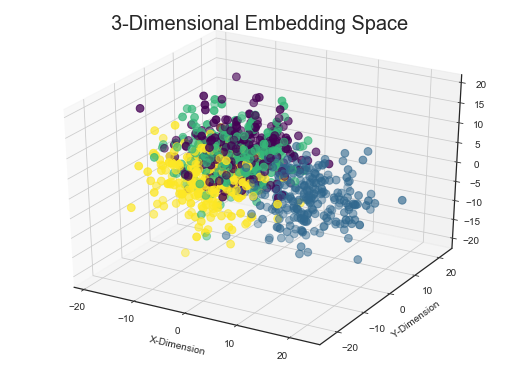

In [8]:
plt.style.use('seaborn-white')
group1 = data.loc[data.y == 0]
group2 = data.loc[data.y == 1]
group3 = data.loc[data.y == 2]
group4 = data.loc[data.y == 3]

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(data['a'], data['b'], data['c'], cmap= 'viridis', c=data['y'], s=60)
#ax = fig.add_subplot(111, projection='3d')
# plt.scatter(group1.a, group1.b, group1.c, c='blue')
# plt.scatter(group2.a, group2.b, group2.c, c='red')
# plt.scatter(group3.a, group3.b, group3.c, c='green')
# plt.scatter(group4.a, group4.b, group4.c, c='orange')
# ax.view_init(30, 10)
# ax.legend()
plt.title('3-Dimensional Embedding Space', fontsize=20)
plt.xlabel('X-Dimension')
plt.ylabel('Y-Dimension')
plt.savefig('dim3d.png')
plt.show()


In [5]:
data_2d = TSNE(n_components=2)
trans_data_2d = data_2d.fit_transform(x)
trans_data_2d[:5]

array([[-23.956144 ,  21.01612  ],
       [ 39.477093 ,   3.948667 ],
       [-23.136387 ,  22.75698  ],
       [ 51.475483 ,   1.7529347],
       [  4.1687684,  17.29558  ]], dtype=float32)

In [10]:
dim2 = pd.DataFrame(trans_data_2d, columns=['x','y'])
data2D = pd.concat([dim2, Y], axis=1)
data2D.columns = ['x','y','label']
data2D.head()

,x,y,label
0,-23.956144,21.016121,2
1,39.477093,3.948667,1
2,-23.136387,22.756981,0
3,51.475483,1.752935,1
4,4.168768,17.295580,0


In [11]:
grp1 = data2D.loc[data2D.label == 0]
grp2 = data2D.loc[data2D.label == 1]
grp3 = data2D.loc[data2D.label == 2]
grp4 = data2D.loc[data2D.label == 3]

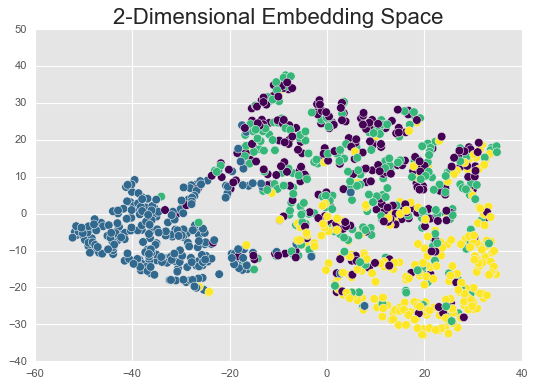

In [100]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(7,5))
plt.scatter(data2D.x, data2D.y, cmap='viridis', c=data2D.label, s=60)
plt.title('2-Dimensional Embedding Space', fontsize=20)
plt.savefig('dim2d.png')
plt.show()


stack overflow 3d scatter: https://stackoverflow.com/questions/1985856/how-to-make-a-3d-scatter-plot-in-python
parallel coordinate plot: http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

In [53]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [20]:
plt.style.use('ggplot')

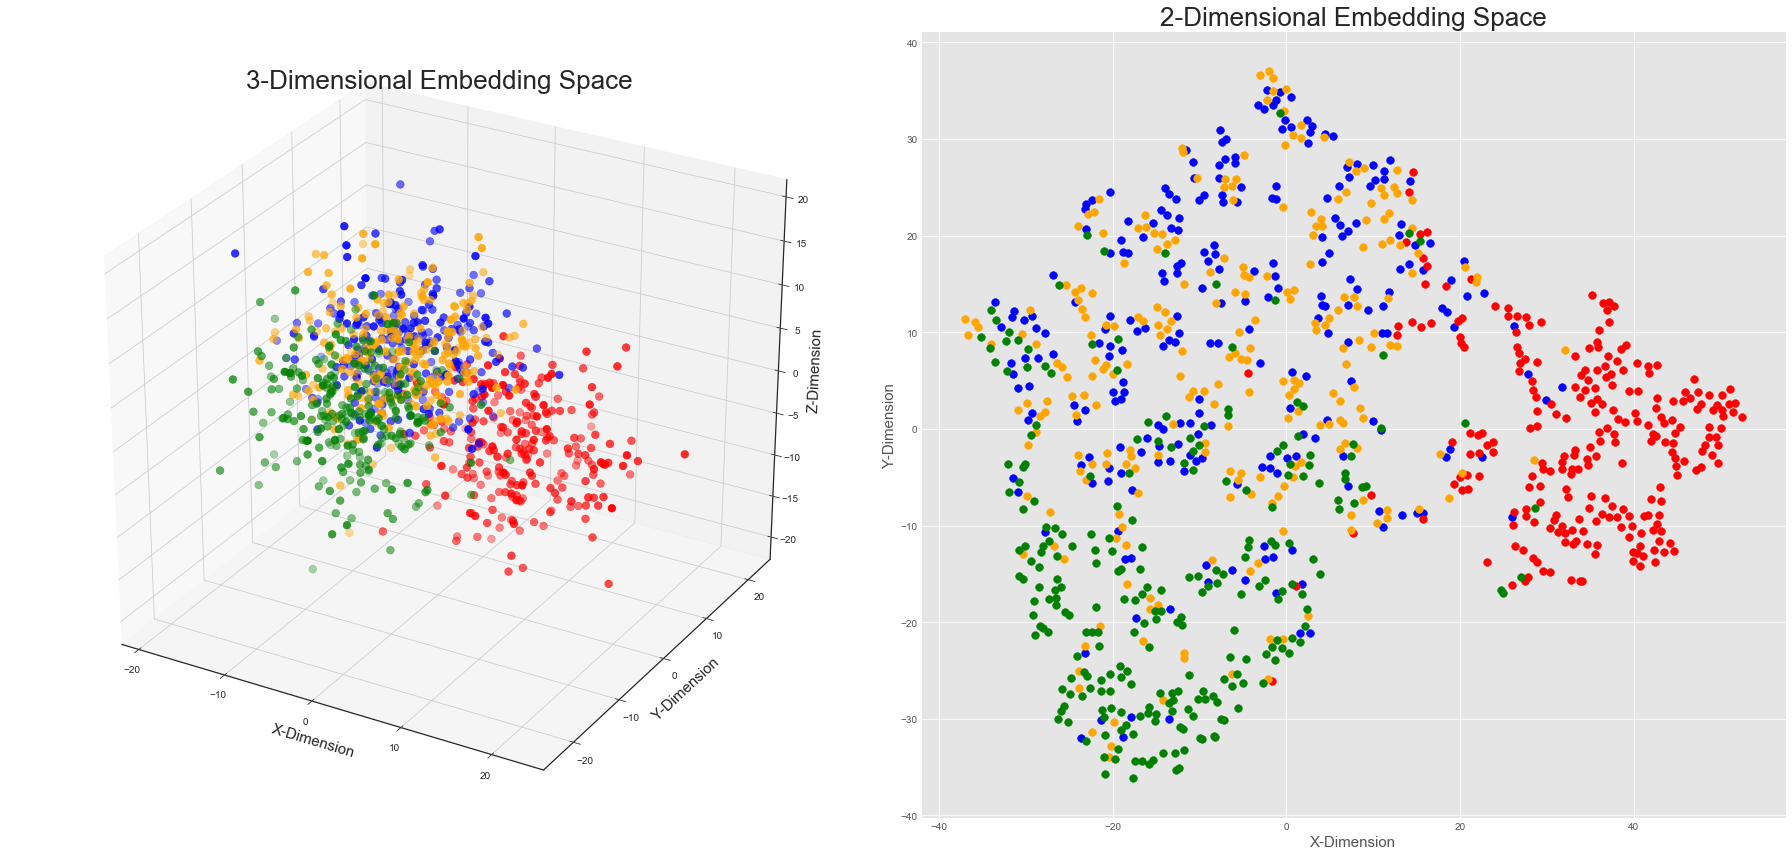

In [51]:
fig = plt.figure(figsize=(25,12))
plt.style.use('seaborn-white')
ax = fig.add_subplot(121, projection='3d')
ax.scatter(group1['a'], group1['b'], group1['c'], c='blue', s=60)
ax.scatter(group2['a'], group2['b'], group2['c'], c='red', s=60)
ax.scatter(group3['a'], group3['b'], group3['c'], c='orange', s=60)
ax.scatter(group4['a'], group4['b'], group4['c'], c='green', s=60)
ax.set_title('3-Dimensional Embedding Space', fontsize=26)
ax.set_xlabel('X-Dimension', fontsize=15)
ax.set_ylabel('Y-Dimension', fontsize=15)
ax.set_zlabel('Z-Dimension', fontsize=15)
# ax.view_init(30, 10)
# ax.legend()
# plt.show()

#fig = plt.figure(figsize=(20,10))
plt.style.use('ggplot')
ax2 = fig.add_subplot(122)
ax2.scatter(grp1['x'], grp1['y'], c='blue', s=60)
ax2.scatter(grp2['x'], grp2['y'], c='red', s=60)
ax2.scatter(grp3['x'], grp3['y'], c='orange', s=60)
ax2.scatter(grp4['x'], grp4['y'], c='green', s=60)
ax2.set_title('2-Dimensional Embedding Space', fontsize=26)
ax2.set_xlabel('X-Dimension', fontsize=15)
ax2.set_ylabel('Y-Dimension', fontsize=15)
# ax.legend()
#plt.savefig('both_figs4.png')
plt.tight_layout()